## Data Visualization via Dimensionality Reduction

**Data Visualization via Dimensionality Reduction**

Data visualization is a useful technique that can help us understand the characteristics of a dataset. We are going to practice this skill using the University Offer of Admission Dataset (UDOAD).

**Dataset: Taiwan University Department Offer of Admission Dataset (UDOAD; 大學推薦甄選資料集)**

A large portion of high school students gets admitted to universities through an application and screening process that requires each university department to offer admission to applicants first before students can choose where they want to go. If we think of applicants as the customers of an academic department, then the duplications of offered applicants from different departments can be used to understand the competitive relationships between academic departments. We are going to visualize this competition relationship using UDOAD.

UDOAD was collected through a popular online offer searching service (https://freshman.tw/; site no longer operational) for the 2017 academic year. We collected the offers received by each applicant as well as the basic information for academic departments. This dataset contains two files

*   student_admission106.csv: the offers received by each student applicant.
*   univ_name106short1.csv: the basic information, such as the name and field of academic departments.


The department_id can uniquely identify an academic department. We do not care about the ranking of admission here, and you should ignore the "state" column. We only care about the "co-application" relations in this dataset. You should use student_id to uniquely identify a student applicant.

You can use this dataset to identify the name of a department_id. The school_name and department_name contain the "full name" of an academic department. To facilitate visualization, we also provide "shorter names" in school_name_abbr and department_name_abbr. The category_name is the field of an academic department. This field is essential in our visualization exercise since you should color each data point according to its category_name.

**Implementation Restrictions**

You are allowed to use any Python libraries in your solution.

### **Question 1 [Data Preparation]**
Prompt:
Our focus is on the relationships between departments. To do this, we need to convert the raw data into a "matrix" representation. Each row represents an academic department, and each column represents a student applicant. The value of the cell is one if a student applied for admission to the corresponding academic department, and 0 otherwise.

To avoid potential numerical problems, we only include an academic department if it received ten or more applications. Moreover, we only include a student applicant if he or she applied for more than one academic department. You need to make sure that both conditions are satisfied in your processed dataset.

Note that the two conditions should be satisfied "as is" in your final dataset. For example, if a student applied for two departments in the original dataset, and one of the departments was removed, then this student should be removed as well because the student only applied for one department in the processed dataset.


In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5146127216402140256, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6727118255804153283
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

stu_adm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('/content/drive/My Drive/Colab Notebooks/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head (10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [ ]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


,year,school_id,department_id,school_name,department_name,category_id,category_name,school_name_abbr,department_name_abbr
0,106,006,006042,國立政治大學,教育學系,1,教育,政大,教育
1,106,006,006052,國立政治大學,教育學系(公費生),1,教育,政大,教育(公)
2,106,006,006062,國立政治大學,教育學系(原住民公費生),1,教育,政大,教育(原住民)
3,106,006,006022,國立政治大學,歷史學系,2,藝術及人文,政大,歷史
4,106,006,006152,國立政治大學,民族學系,2,藝術及人文,政大,民族學
5,106,006,006032,國立政治大學,哲學系,2,藝術及人文,政大,哲學
6,106,006,006262,國立政治大學,英國語文學系,2,藝術及人文,政大,英國語文
7,106,006,006292,國立政治大學,日本語文學系,2,藝術及人文,政大,日本語文
8,106,006,006272,國立政治大學,阿拉伯語文學系,2,藝術及人文,政大,阿拉伯語文
9,106,006,006302,國立政治大學,韓國語文學系,2,藝術及人文,政大,韓國語文


### Q1

Objective: Create a matrix where each row represents a department, and each column represents an applying student. In this matrix, each cell's value is either 0 or 1, where 1 indicates an application, and 0 indicates no application.

The matrix should satisfy two conditions:
1. Only include departments with 10 or more applicants.
2. Only include students who have applied to more than one department.
Note: The processed dataset should also comply with these two conditions.

#### Q1.1   
Prompt: Report the number of academic departments and student applicants in your dataset.

In [ ]:
matrix = pd.DataFrame(np.zeros((ndepid, nstuid)), index = all_depid, columns = all_stuid, dtype = 'int8')
for i, row in stu_adm.iterrows():
    matrix.loc[row['department_id'], row['student_id']] = 1
print("The size of the matrix is ", matrix.shape)
matrix

The size of the matrix is  (1976, 60461)


,10246842,10042237,10008031,10201525,10014615,10294018,10022810,10236223,10025909,10123708,10184040,10164641,NTU0600038,10062234,10302830,10165037,10033404,10014814,10125333,10014627,10306037,NTU0600034,10013015,10096836,10137442,10015629,10163105,10084836,10263720,10266113,10266511,10239623,NTU0600033,10305811,10306542,10006201,10012227,10012815,10013117,10014015,...,10038324,10203233,10155140,10110807,10018032,10102310,10023440,10208118,10057038,10072937,10000937,10232830,10286031,10300129,10039532,10067109,10205427,10215038,10210802,10052131,10275831,10115626,10135339,10245212,10219539,10085517,10108905,10196801,10243632,10014322,10067929,10217841,10221102,10252519,10223912,10159601,10206737,10204132,10234328,10279214
001012,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001022,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001032,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001052,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
151012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


In [ ]:
print("Start to process the data to satisfy the two conditions.")
dep_deleted = True
stu_deleted = True
while(dep_deleted or stu_deleted):
    dep_sum = matrix.sum(axis=1)
    dep_to_del = dep_sum[ dep_sum < 10].index.tolist()
    if len(dep_to_del) != 0:
        print("Delete %d departments" %(len(dep_to_del)))
        matrix.drop(dep_to_del, axis = 0, inplace = True)
        stu_deleted = True
    else:
        print("No deletion on departments.")
        dep_deleted = False

    stu_sum = matrix.sum(axis=0)
    stu_to_del = stu_sum[ stu_sum <= 1].index.tolist()
    if len(stu_to_del) != 0:
        print("Delete %d students" %(len(stu_to_del)))
        matrix.drop(stu_to_del, axis = 1, inplace = True)
        stu_deleted = True
    else:
        print("No deletion on students.")
        stu_deleted = False

Start to process the data to satisfy the two conditions.
Delete 45 departments
Delete 13041 students
Delete 13 departments
Delete 34 students
Delete 1 departments
No deletion on students.
No deletion on departments.
No deletion on students.


In [ ]:
stu_sum_cat = np.sort(matrix.sum(axis=0).unique())
print("The categories of the number of departments that students applied are ",stu_sum_cat)

The categories of the number of departments that students applied are  [2 3 4 5 6]


In [ ]:
dep_sum_cat = np.sort(matrix.sum(axis=1).unique())
print("The categories of the number of students that applied for each departments are \n",dep_sum_cat)

The categories of the number of students that applied for each departments are 
 [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 179 180 181 182 183 184 185 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 204 205 206 207 208 209 210
 211 214 215 216 217 218 219 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 236 237 238 240 241 242 243 24

Confirmed that the processed matrix meets the following criteria: each student has applied to more than one department, and each department has at least 10 applicants.

In [ ]:
print("There are %d departments and %d students after processing the data to meet the two conditions."%matrix.shape)

There are 1917 departments and 47386 students after processing the data to meet the two conditions.


#### Q1.2  
Prompt: Report the top ten departments that received the most applications and the number of applications they received. Identify the department by its department_id and names.

Procedure:

1. Create a series called "dep_sum" by summing the applications for each department.
2. Sort "dep_sum" in descending order and take the top ten. Store their indices in the "top_10_dep" list.
3. Extract data for these top ten departments from "dep_sum" and save it as a DataFrame.
4. Use "uname" to find data for these ten departments and store the fields of department ID, university name, and department name in "top_10_dep_info."
5. Add university and department names to "top_10_df" and appropriately name and reorder the columns.
6. Obtain a DataFrame containing information about the top ten departments with the highest number of applications.

In [ ]:
dep_sum = matrix.sum(axis=1)
top_10_dep = dep_sum.sort_values(ascending = False).index.tolist()[:10]
top_10_df = dep_sum[top_10_dep].to_frame()
top_10_dep_info = uname[uname['department_id'].isin(top_10_dep)][['department_id','school_name','department_name']].set_index('department_id')
top_10_df[['school_name', 'department_name']] = top_10_dep_info
top_10_df = top_10_df.reset_index()
top_10_df.index = np.arange(1, len(top_10_df) + 1)
top_10_df.index.name = 'Rank by applicants number'
top_10_df.columns = ['department_id','total applicants','school_name','department_name']
top_10_df = top_10_df.reindex(columns = ['department_id','school_name','department_name', 'total applicants'])
top_10_df

,department_id,school_name,department_name,total applicants
Rank by applicants number,,,,
1,008122,中原大學,機械工程學系,386
2,012052,中國醫藥大學,藥學系,376
3,046032,銘傳大學,會計學系（臺北校區）,367
4,004382,國立成功大學,電機工程學系,357
5,005192,東吳大學,企業管理學系,353
6,008112,中原大學,土木工程學系,353
7,005182,東吳大學,會計學系,351
8,015342,逢甲大學,財務金融學系,340
9,045012,義守大學,電機工程學系,339


### **Question 2 [Explore]**
Prompt: Visualize academic departments in the following questions. In all plots, color data points according to the academic department's category. Moreover, provide a legend or a picture that illustrates the mapping between colors and category names. Visualize the data using two-dimensional plots.

Procedure: To visualize departmental data on a two-dimensional coordinate system, with different categories represented by different colors, and to provide a legend, we can start by creating a function called build_df. This function will take the reduced-dimensional array, convert it into a DataFrame, set the index, and add columns for "category_name" and "category_id" to facilitate coloring.

In [ ]:
def build_df( trans_arr ):
  df = pd.DataFrame(trans_arr)
  df.index = matrix.index
  df.index.name = 'dep_id'
  category_label = uname[['department_id','category_name','category_id']].set_index('department_id')
  df['category_name'] = category_label['category_name']
  df['category_id'] = category_label['category_id'].astype('int')
  df['category_id'][df['category_id']==99] = 11
  return df

In [ ]:
def plot_3D(data, model_name,  figsize = (10,10) ):
  fig = plt.figure(figsize=figsize)
  plot = fig.add_subplot(111, projection='3d')
  data.columns = ['F1', 'F2', 'F3','category_name','category_id']
  n_clusters = 11
  cmap = cm.get_cmap('Paired')

  for i, data in data.groupby('category_id'):
      plot.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=np.array([cmap(i/n_clusters)]), \
                        label=data['category_name'][data['category_id']==i].unique()[0], depthshade=False)
  lgd = plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

  plt.title( model_name + "降維後分布", fontsize=20)
  plot.set_xlabel('F1')
  plot.set_ylabel('F2')
  plot.set_zlabel('F3')

  plt.savefig(model_name + " 3D plot.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
  plt.show()

In [ ]:
def plot_2D(data, model_name, figsize = (10,10)):
  plt.rcParams['figure.figsize'] = figsize
  fig, ax1 = plt.subplots(1,1)
  data.columns = ['F1', 'F2','category_name','category_id']
  g = sns.scatterplot(x = 'F1',y='F2', hue='category_name',data = data, palette='Paired',ax=ax1)
  lgd = g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
  txt = plt.title( model_name+" 降維後分布", fontsize=20)
  g.set_xlabel('F1')
  g.set_ylabel('F2')
  plt.savefig( model_name+" 2D plot.png",bbox_extra_artists=(lgd,txt), bbox_inches='tight')
  plt.show()

In [ ]:
def pairplot(data, used_col_num, model_name):
  plot = sns.pairplot(data = data.iloc[:,:used_col_num], hue="category_name",palette="Paired", corner=True )
  plot.savefig( model_name + " Pariwise Plot.png")

Because category names are in Chinese, direct plotting cannot display properly. Therefore, I set up the Chinese font first. I used the downloaded Microsoft JhengHei font (msjh.ttf). Additionally, after applying Chinese fonts, there were issues with displaying negative signs, which I used rcParams to address.

In [ ]:
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

fm.fontManager.addfont('/content/drive/My Drive/Colab Notebooks/msjh.ttf')

In [ ]:
sns.set_style("dark",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['axes.unicode_minus']=False

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

#### Q 2.1  
Prompt: Visualize academic departments using the first eight principal components. Use your judgment to select multiple pairs of principal components to visualize. Discuss the visual patterns with respect to department categories.

In [ ]:
pca = PCA(n_components=8)
PCA_data = build_df(pca.fit_transform(matrix))
PCA_data.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','category_name','category_id']
PCA_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,category_name,category_id
dep_id,,,,,,,,,,
001012,-0.032970,-0.012536,-0.185331,-0.036808,0.095992,0.017249,-0.108165,-0.055373,藝術及人文,2
001022,0.195138,-0.013346,-0.243328,-0.065595,0.133282,0.140757,-0.122773,-0.189851,藝術及人文,2
001032,-0.038774,-0.013080,-0.211741,-0.055553,0.085556,0.039260,-0.095783,-0.083316,藝術及人文,2
001042,0.002865,-0.020438,-0.170012,-0.051404,0.065201,0.028624,-0.107121,-0.038649,藝術及人文,2
001052,-0.016220,-0.002377,-0.156293,-0.031357,0.075693,0.013719,-0.094333,-0.038741,藝術及人文,2
...,...,...,...,...,...,...,...,...,...,...
150122,-0.062669,-0.006004,-0.121800,-0.072911,0.039323,-0.004992,-0.097289,-0.007907,農業、林業、漁業及獸醫,8
150132,-0.172705,-0.040591,0.578499,-0.619173,0.217411,0.013842,-0.069454,-0.020954,工程、製造及營建,7
150142,-0.184441,-0.049484,0.752073,-0.673794,0.144204,-0.031913,0.122348,-0.000212,工程、製造及營建,7


In [ ]:
pca.explained_variance_

array([0.43965556, 0.3981099 , 0.35397433, 0.34895331, 0.29343556,
       0.27737847, 0.27109333, 0.26554705])

In [ ]:
pca.explained_variance_ratio_

array([0.00502831, 0.00455315, 0.00404838, 0.00399095, 0.003356  ,
       0.00317236, 0.00310047, 0.00303704])

In [ ]:
pca.explained_variance_ratio_.sum()

0.030286665947010284

The obtained explained_variance_ratio values are all very small. The sum of the explained_variance_ratio for these eight principal components is approximately 0.03. From this, it can be inferred that these eight principal components extracted by PCA might not effectively represent the original data's characteristics. Therefore, the results of dimensionality reduction using PCA are not favorable.

Next, I will observe the characteristics of each category of departments through two-dimensional plots of each pair of principal components.

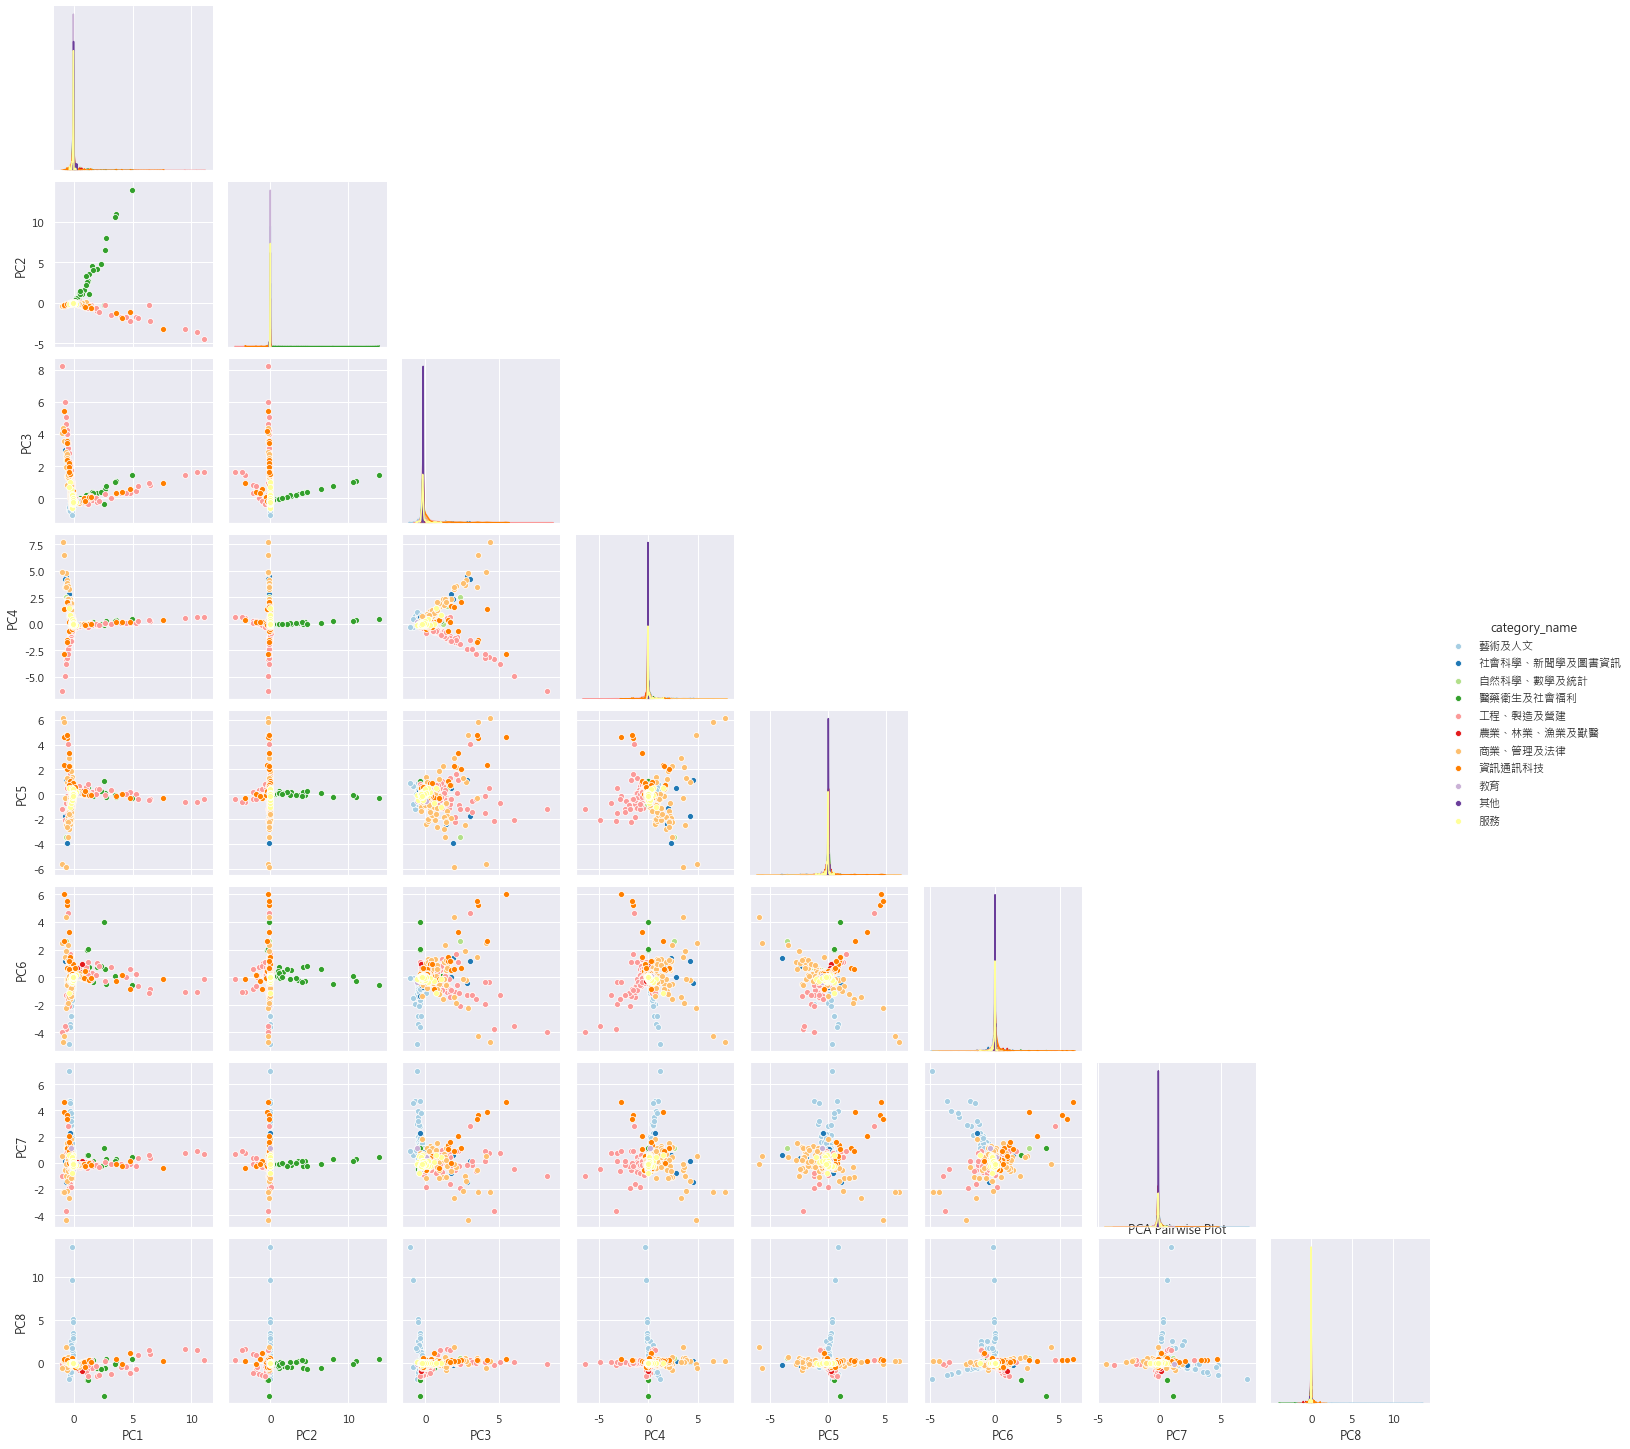

In [ ]:
pairplot(data = PCA_data, used_col_num=9, model_name="PCA" )

From the overall observations of the plots, I think PC1 is good at distinguishing the "Engineering, Construction, and Development" (工程、營造及營建) and "Information and Communication Technology" (資訊通訊科技) discipline clusters. PC2 effectively separates the "Medical, Health, and Social Welfare"(醫藥衛生及社會福利) clusters. PC3 demonstrates good discrimination ability for the service-oriented clusters. PC4, PC5, and PC6 show better clustering capabilities for the "Engineering, Construction, and Development" (工程、營造及營建), "Business, Management, and Law"(商業、管理及法律), and "Information and Communication Technology" (資訊通訊科技) clusters. PC7 and PC8 are more effective at separating the "Arts and Humanities" (藝術與人文) cluster.

Additionally, I've noticed several pairs of principal components that seem to show clear distinctions:

1. PC1 & PC2: Clearly separates into two clusters, with the first cluster being the "Medical, Health and Social Welfare"(醫藥衛生及社會福利) clusters, while the second cluster comprises the "Engineering, Construction, and Development"(工程、營造及營建) and "Information and Communication Technology"(資訊通訊科技) clusters. Other clusters tend to converge near the origin (around PC1=PC2=0).
2. PC1 & PC3: Most categories have a broad distribution, but the "Other" cluster is more visibly distinct.
3. PC5 & PC7: Shows a clearer separation for the "Arts and Humanities" (藝術與人文)cluster.
4. PC3 & PC4: Effectively distinguishes the "Engineering, Construction, and Development"(工程、營造及營建) and "Business, Management, and Law" (商業、管理及法律)clusters.

#### Q2.2  
Propmpt: Visualize academic departments using multiple dimensional scaling. Consider both the metric and non-metric settings. Discuss the result.

Procedure: I will do dimensionality reduction to two and three dimensions, and plot the graphs for comparison.

##### Metric = True

In [ ]:
mds = MDS(n_components=3, metric=True)
MDS_metric_data = build_df(mds.fit_transform(matrix))
MDS_metric_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,category_name,category_id
dep_id,,,,,
001012,-6.166809,0.246985,2.255425,藝術及人文,2
001022,8.106688,-7.596822,-0.125888,藝術及人文,2
001032,-2.082795,2.649845,-7.341735,藝術及人文,2
001042,1.521130,2.014464,-5.444186,藝術及人文,2
001052,3.242754,1.903157,1.314162,藝術及人文,2
...,...,...,...,...,...
150122,-3.539733,0.628685,1.262084,農業、林業、漁業及獸醫,8
150132,-8.747358,-4.838664,5.458684,工程、製造及營建,7
150142,-8.796879,5.016808,0.697630,工程、製造及營建,7


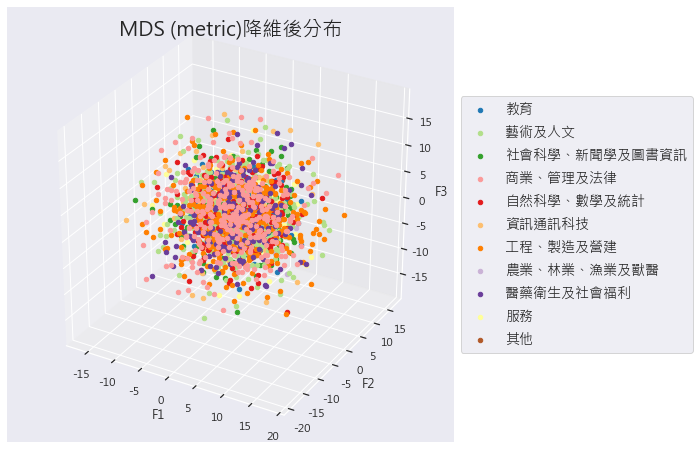

In [ ]:
plot_3D(MDS_metric_data, "MDS (metric)", (8,8))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


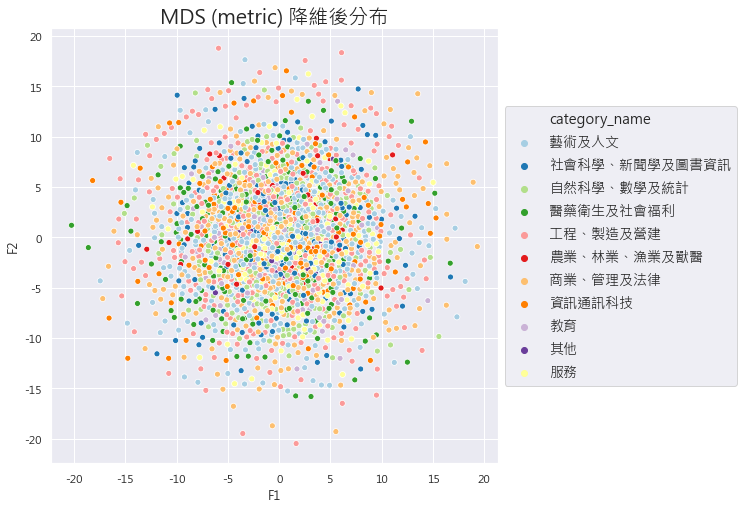

In [ ]:
mds = MDS(n_components=2, metric=True)
MDS_metric_data = build_df(mds.fit_transform(matrix))
plot_2D(MDS_metric_data, "MDS (metric)", (8,8))

From the two graphs above, using MDS (metric) to reduce the data to two dimensions is not effective. Almost every color-coded point appears widely scattered, and there is no apparent clustering effect.

##### Metric = False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


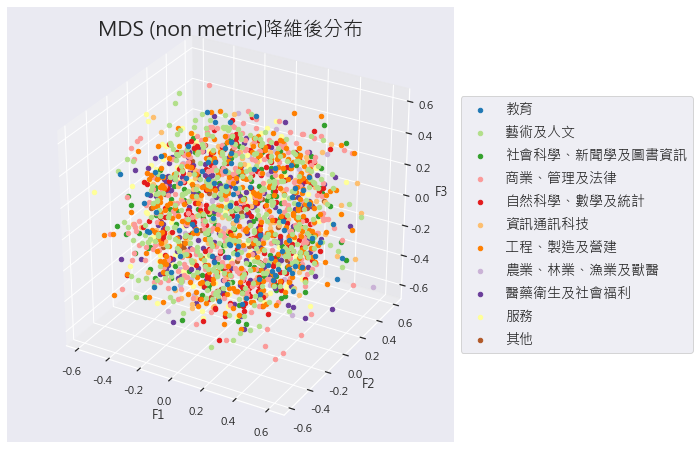

In [ ]:
mds_n = MDS(n_components=3, metric=False)
MDS_non_metric_data = build_df(mds_n.fit_transform(matrix))
plot_3D(MDS_non_metric_data, "MDS (non metric)",(8,8))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


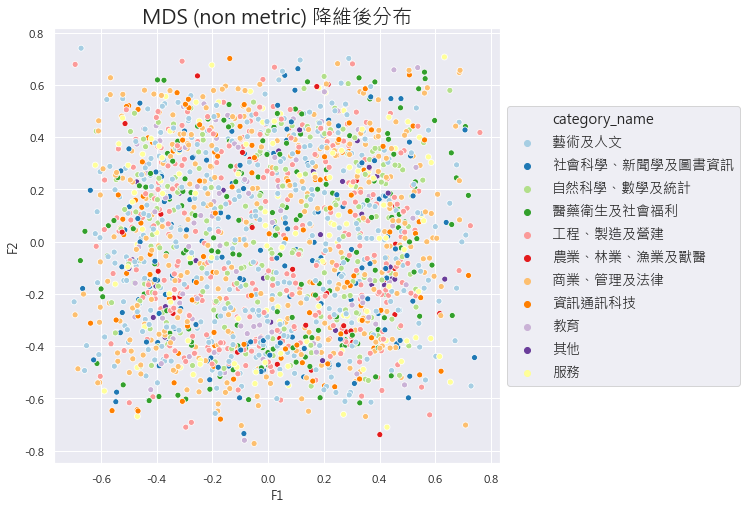

In [ ]:
mds_n = MDS(n_components=2, metric=False)
MDS_non_metric_data = build_df(mds_n.fit_transform(matrix))
plot_2D(MDS_non_metric_data, "MDS (non metric)", (8,8))

The results from MDS (non metric) appear to be more scattered than those from MDS (metric). However, in both cases, whether non-metric or metric MDS, the performance of two-dementional reduction is not satisfactory. No clear clustering can be seen from the plots.

#### Q 2.3
Prompt: Visualize academic departments using Locally Linear Embedding. Consider three variations: (1) Use 20 neighbors to construct the weight matrix; (2) Use 40 neighbors to construct the weight matrix; (3) Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors). Discuss the result.


In [ ]:
import gc
gc.collect()

0

(1) Use 20 neighbors to construct the weight matrix, and reduce the dimensionality to 2.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


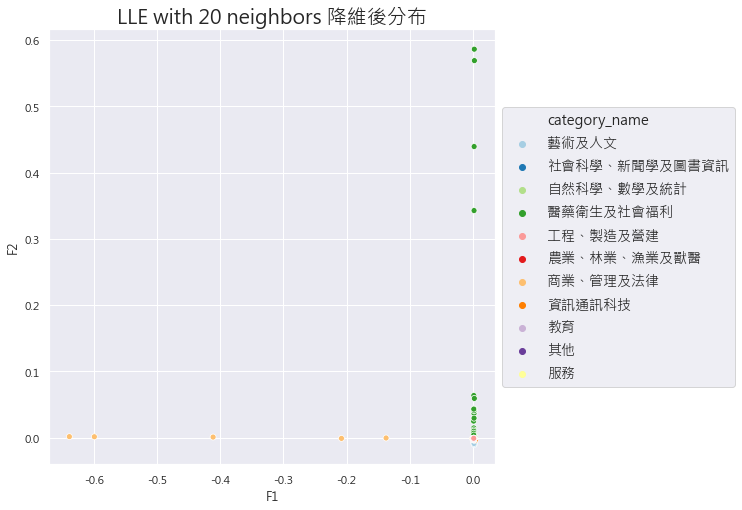

In [ ]:
LLE1 = LLE(n_neighbors = 20, n_components = 2)
LLE1_data = build_df(LLE1.fit_transform(matrix))
plot_2D(LLE1_data, "LLE with 20 neighbors",(8,8))

In [ ]:
LLE1.reconstruction_error_

0.09620144700736258

(2) Use 40 neighbors to construct the weight matrix, and reduce the dimensionality to 2.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


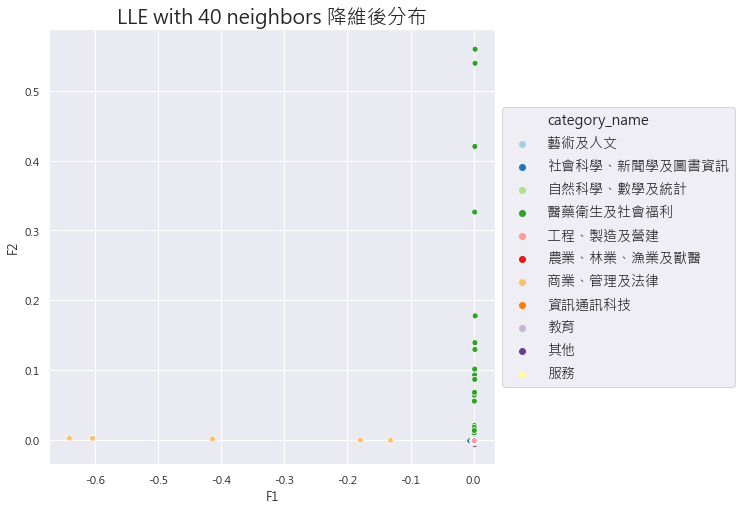

In [ ]:
LLE2 = LLE(n_neighbors = 40, n_components = 2)
LLE2_data = build_df(LLE2.fit_transform(matrix))
plot_2D(LLE2_data, "LLE with 40 neighbors",(8,8))

In [ ]:
LLE2.reconstruction_error_

0.11000246432207522

(3) Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


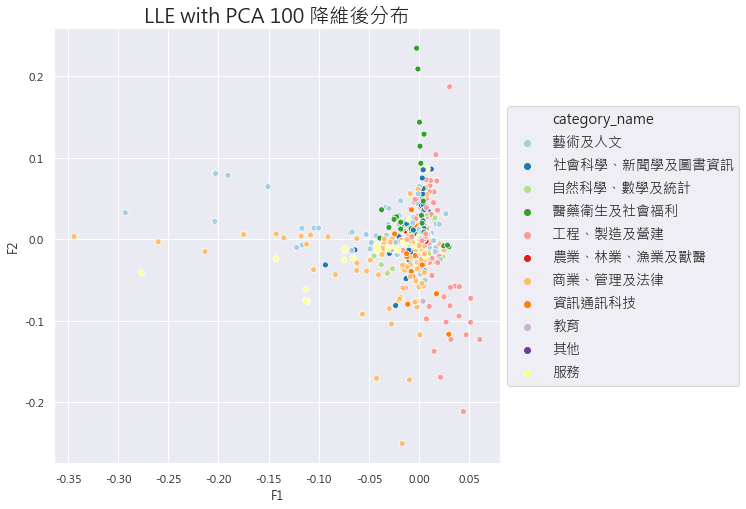

In [ ]:
pca_100 = PCA(n_components = 100)
PCA_100_data =  build_df(pca_100.fit_transform(matrix)).drop(['category_name','category_id'], axis=1)
LLE3 = LLE(n_neighbors = 20, n_components = 2)
LLE3_data = build_df(LLE3.fit_transform(PCA_100_data))
plot_2D(LLE3_data, "LLE with PCA 100", (8,8))

In [ ]:
LLE3.reconstruction_error_

3.0417884891447277e-09

If we compare methods (1) and (2), the results of plots are not satisfactory. They can only distinguish a small number of clusters, mainly in "Medical, Health, and Social Welfare"(醫藥衛生及社會福利) and "Business, Management, and Law"(商業、管理及法律), while the majority of points are concentrated around the origin, showing little differentiation. The reconstruction error for method (1) is slightly smaller.

Method (3), which involves using PCA before LLE, shows a significantly better outcome than the first two methods. Although I can see slight clustering, overall, the data points are still highly concentrated.

#### Q 2.4
Prompt: Visualize academic departments using Kernel PCA. You should at least consider the RBF and Cosine kernel. It is your responsibility to select reasonably good kernel parameters. Discuss the result.

Procedure:  
To make the results comparable with the PCA in the first question, I also set the n_components to 8 in this case, and visualized the data using pairwise two-dimensional plots .

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

##### RBF kernel
In the following, I will use GridCV to find the optimal gamma. Since sklearn's kernel PCA itself does not have a built-in scoring method, I will first define a scorer using MSE and then do the grid search.

In [ ]:
def my_scorer(estimator, X):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -mean_squared_error(X, X_preimage)

In [ ]:
param_grid = [{ "gamma": np.linspace(0.001, 0.03, 10)}]

In [ ]:
# Tuning alpha and gamma using rbf kernel
kpca_rbf = KernelPCA( kernel = 'rbf', n_components = 8, fit_inverse_transform=True)
best_kpca_rbf = GridSearchCV(kpca_rbf,param_grid=param_grid, scoring=my_scorer, verbose=1)
best_kpca_rbf.fit(matrix)
best_kpca_rbf_data = build_df(best_kpca_rbf.transform(matrix))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


In [ ]:
best_kpca_rbf.best_params_

{'gamma': 0.007444444444444444}

From the above, dividing the range from gamma = 0.001 to 0.03 into ten equal parts, I found that gamma = 0.0074 minimizes the MSE. Hence, I will use this value as my parameter.

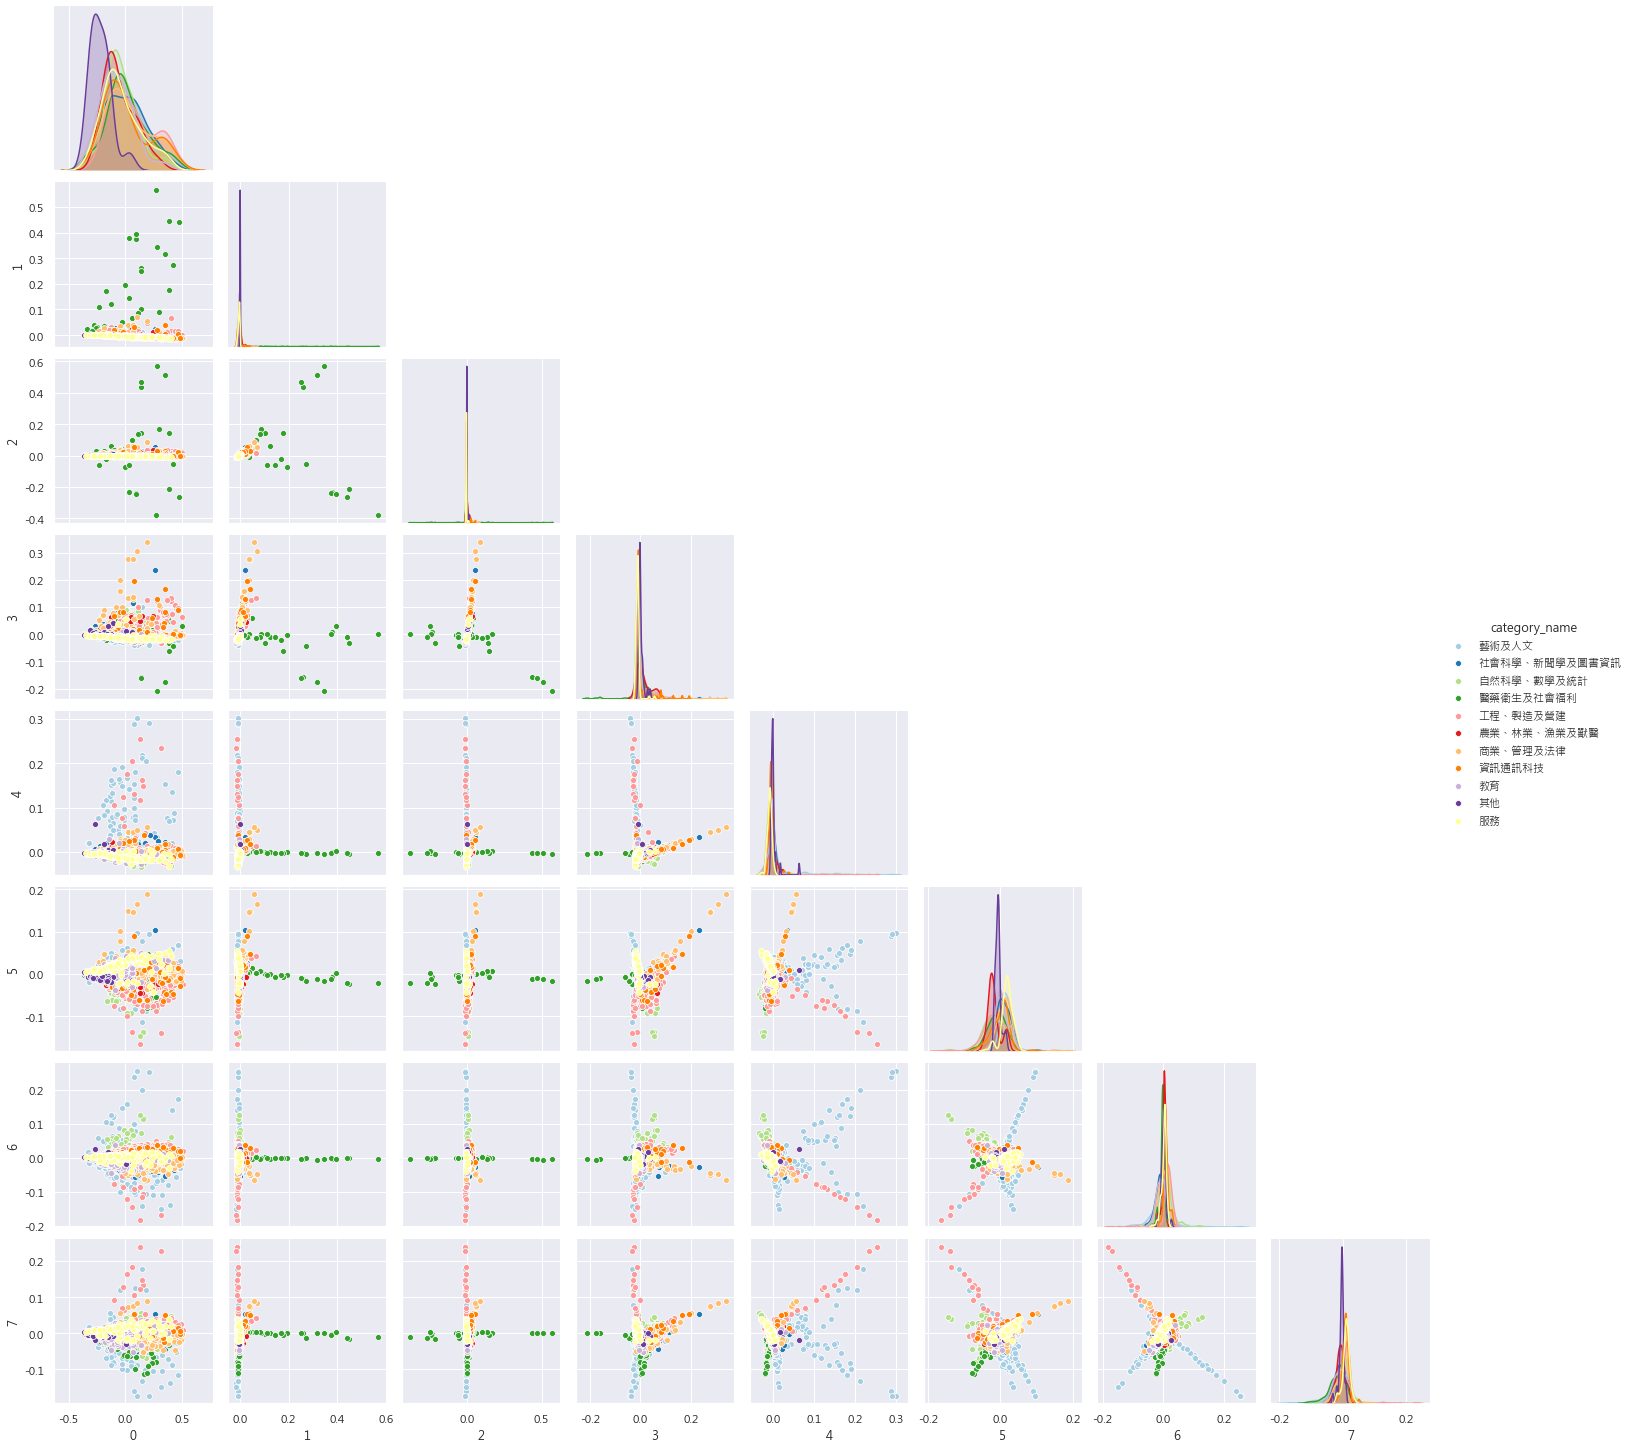

In [ ]:
pairplot(data=best_kpca_rbf_data, used_col_num= 9, model_name="Kernel PCA with rbf kernel")

The observations and comparisons of the plots will be explained together at the end of this sub-question.

##### Kernel = cosine
From the documentation, it is known that gamma is not applicable to the cosine kernel. Therefore, I will skip hyperparameter tuning and directly use the kernel PCA model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


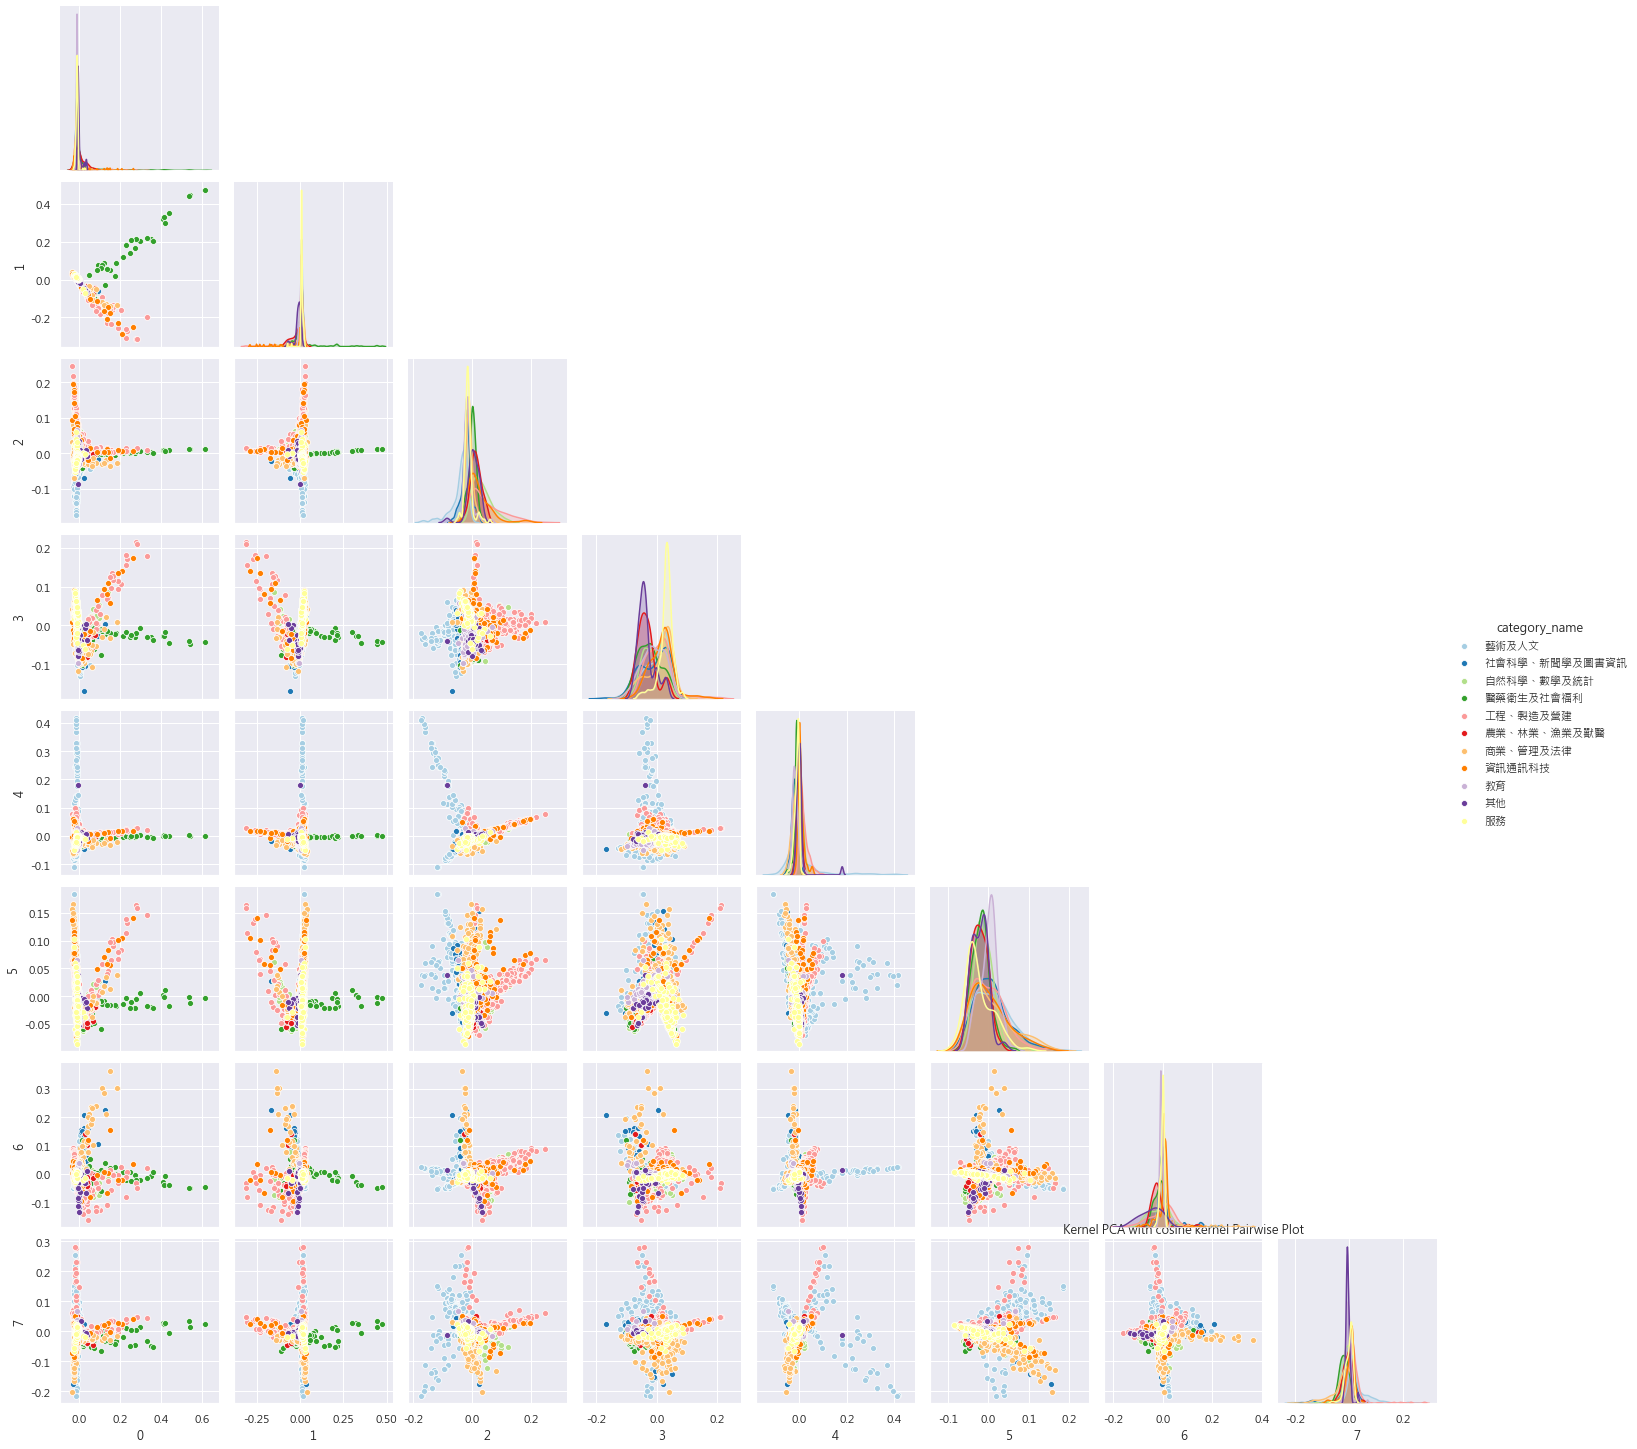

In [ ]:
kpca_cos = KernelPCA( kernel = 'cosine', n_components = 8, fit_inverse_transform=True)
kpca_cos_data =  build_df(kpca_cos.fit_transform(matrix))
pairplot(data=kpca_cos_data, used_col_num= 9, model_name="Kernel PCA with cosine kernel")

##### Kernel = sigmoid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


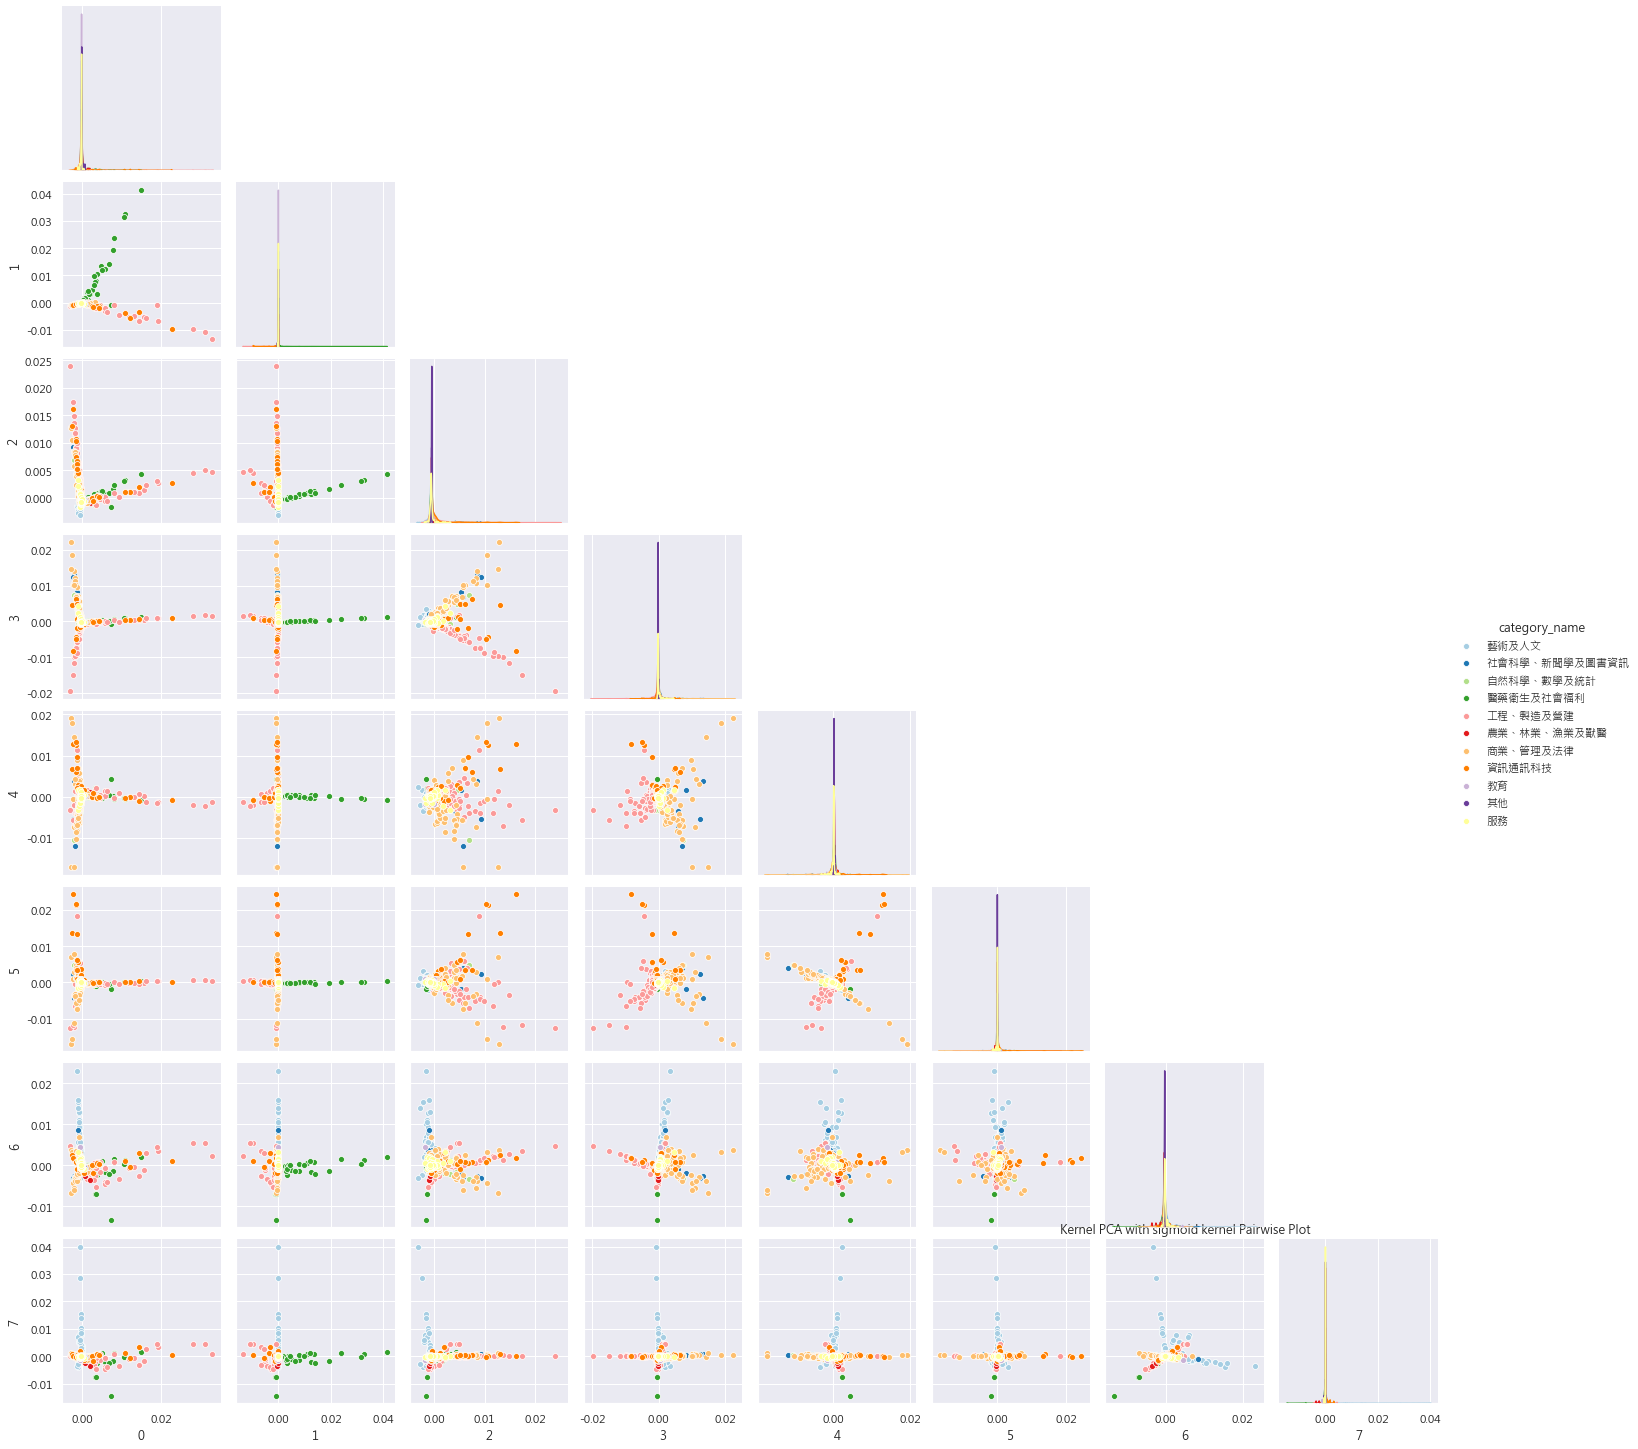

In [ ]:
kpca_sig = KernelPCA( kernel = 'sigmoid', n_components = 8, fit_inverse_transform=True)
kpca_sig_data =  build_df(kpca_sig.fit_transform(matrix))
pairplot(data=kpca_sig_data, used_col_num = 9, model_name = "Kernel PCA with sigmoid kernel")

From the pairwise plots above, it can be observed that using the cosine kernel can effectively differentiate the clusters, such as deep green (Medical and Health), pink (Engineering) + orange (Information), light blue (Arts and Humanities), yellow (Service), and purple (Other). While the rbf kernel can well distinguish deep green (Medical and Health), pink (Engineering), and light blue (Arts and Humanities), the classification for other categories is not as clear. The sigmoid kernel's clustering effect is slightly worse than the rbf kernel. Through the comparison of pairwise plots, I find that the performance of the cosine kernel is relatively better.

Another interesting observation is that the cosine kernel tends to categorize pink and orange into the same group. I think it's reasonable because many students often apply for both Electrical Engineering and Computer Science together, making these two categories closely related. Additionally, in most reduced-dimensional results, it seems challenging to distinctly separate the Business and Management category. My personal guess is that many applicants may choose a Business-related program as a backup even when applying for Medical or Electrical Engineering programs, which could make it difficult to clearly differentiate the Business and Management category.

#### Q 2.5
Prompt: Visualize academic departments using t-SNE. You should consider at least the Euclidian, Cosine, and Jaccard metric. Set numpy random seed so that your results can be repeated. Discuss the result.


Procedure: Since t-SNE can only reduce dimensionality to a maximum of four, I chose to reduce it to a two-dimensional plot for ease of visualization. Additionally, the perplexity hyperparameter determines the number of neighbors used in the KNN process. The specific values I chose for perplexity were decided after trying different numbers, so I did not do a grid search.

##### Metric = Euclidean

In [ ]:
tsne_eu = TSNE(n_components=2, perplexity=26, learning_rate=200.0, n_iter=800, n_iter_without_progress=300, min_grad_norm=1e-07, \
            metric='euclidean', verbose=1, random_state=np.random.RandomState(1))
tsne_eu_data = build_df(tsne_eu.fit_transform(matrix))

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 1917 samples in 7.965s...
[t-SNE] Computed neighbors for 1917 samples in 327.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 1.485635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 177.880814
[t-SNE] KL divergence after 800 iterations: 3.988042


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


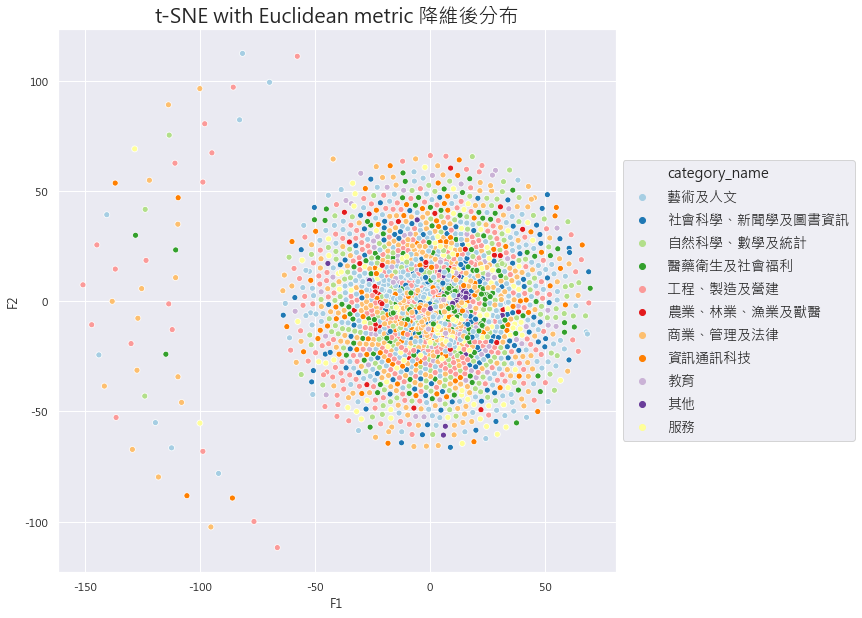

In [ ]:
plot_2D(tsne_eu_data,"t-SNE with Euclidean metric")

While the plot looks colorful and visually appealing, it completely fails to achieve a clustering effect.

##### Metric = cosine

In [ ]:
tsne_cos = TSNE(n_components=2, perplexity=10, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, \
            metric='cosine', verbose=1, random_state=np.random.RandomState(1))
tsne_cos_data = build_df(tsne_cos.fit_transform(matrix))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1917 samples in 0.086s...
[t-SNE] Computed neighbors for 1917 samples in 0.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 0.186837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.640228
[t-SNE] KL divergence after 1000 iterations: 1.209784


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


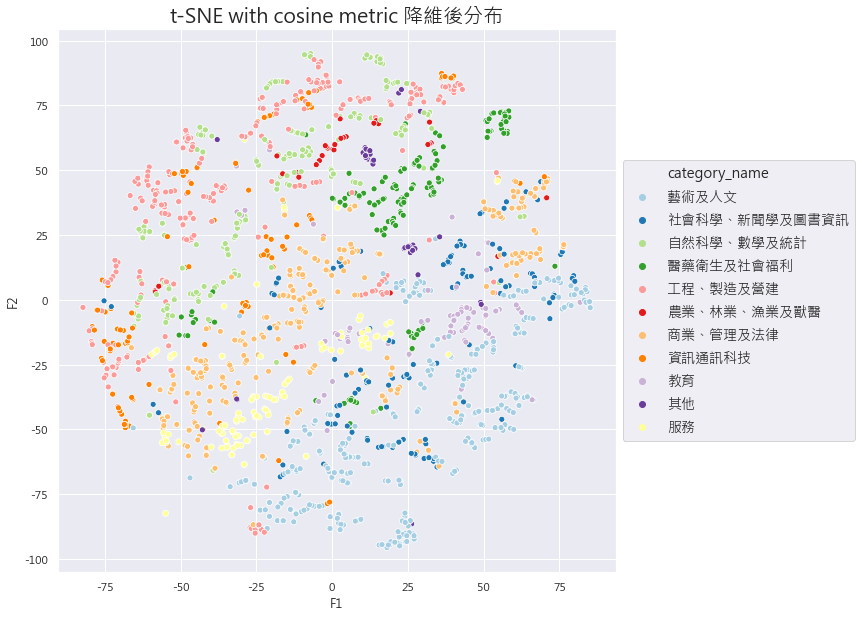

In [ ]:
plot_2D(tsne_cos_data,"t-SNE with cosine metric")

This plot shows good classification results. It is easy to visually distinguish each cluster in a reasonable distribution, with the right-bottom corner belonging to Arts and Humanities, the left-top corner to Electrical Engineering and Computer Science, and the middle region sandwiched between Medical and Health and Business and Management.

##### Metric = Jaccard

In [ ]:
tsne_jac = TSNE(n_components=2, perplexity=10, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, \
            metric='jaccard', verbose=1, random_state=np.random.RandomState(1))
tsne_jac_data = build_df(tsne_jac.fit_transform(matrix))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1917 samples in 7.541s...
[t-SNE] Computed neighbors for 1917 samples in 352.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 0.143984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.880692
[t-SNE] KL divergence after 1000 iterations: 1.407689


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


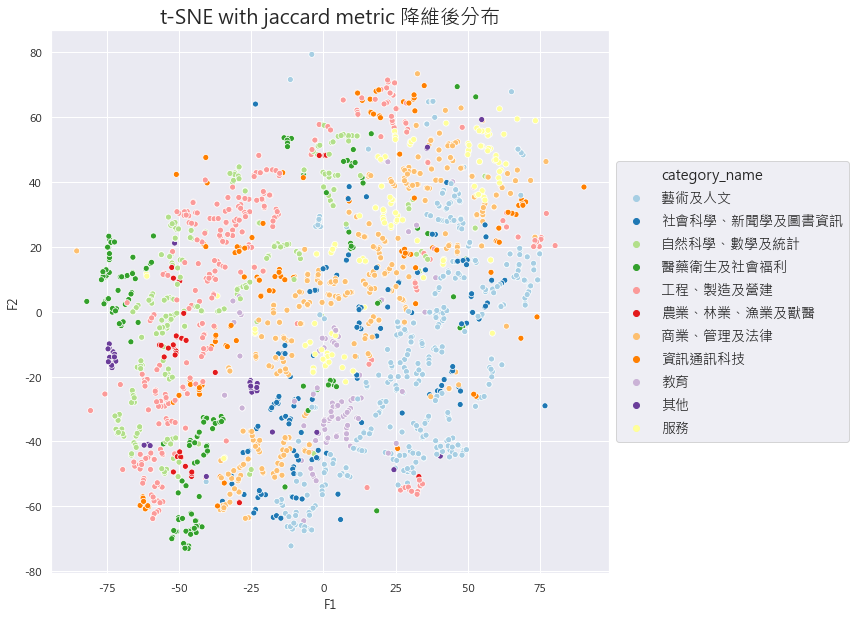

In [ ]:
plot_2D(tsne_jac_data,"t-SNE with jaccard metric")

From the above plot, the clustering result using the Jaccard metric is also quite good, only slightly worse than the cosine metric. For example, the clustering of Medical and Health with Social Sciences is not as clear.

I think this result might be attributed to the characteristics of the data. In our dataset, the number of 0s is much larger than the number of 1s. The relationship between two departments using the Euclidean metric may not show significant differences because, in the majority of cases where the value is 0, the denominator (n) is over 40,000, making it challenging to accurately determine who is the neighbor of whom. On the other hand, cosine and Jaccard metrics can overcome this issue, leading to better results.

### Q3
Prompt: Select the most promising visualization method in the previous question and refine the result. You should color points by department category. Label each data point with its name so that we can quickly identify a data point on the picture. Moreover, you should try to reduce the problem caused by overlapping points and labels. Output an image that is large enough so that a user can easily identify a department and its neighbors. Jupyter Lab has limitations on the largest picture size. To overcome this problem, output the picture to a separate file and submit the file for grading. Your score depends on how useful, readable, and visually pleasing of your visualization results.

Procedure: From the results of Q2, t-SNE must be my choice. Beyond that, considering the findings from the LLE question, where using PCA to extract important features before dimensionality reduction showed good results, I decided to select 100 components using kernel PCA first and then further reduce it to two dimensions using t-SNE with the cosine metric.

In [ ]:
kpca_final = KernelPCA( kernel = 'cosine', n_components = 500)
data_mid = build_df(kpca_final.fit_transform(matrix)).drop(['category_name','category_id'], axis=1)
tsne_final = TSNE(n_components=2, perplexity=20, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, \
                  metric='cosine', verbose=1, random_state=np.random.RandomState(1))
final_data = build_df(tsne_final.fit_transform(data_mid))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1917 samples in 0.001s...
[t-SNE] Computed neighbors for 1917 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 0.401390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.054726
[t-SNE] KL divergence after 1000 iterations: 1.248505


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
final_data

,0,1,category_name,category_id
dep_id,,,,
001012,30.038033,-59.062603,藝術及人文,2
001022,30.269844,-55.071972,藝術及人文,2
001032,31.678951,-59.043610,藝術及人文,2
001042,32.051746,-58.573097,藝術及人文,2
001052,32.870159,-59.477665,藝術及人文,2
...,...,...,...,...
150122,39.261131,1.088991,農業、林業、漁業及獸醫,8
150132,41.651649,33.800468,工程、製造及營建,7
150142,40.795284,34.975101,工程、製造及營建,7


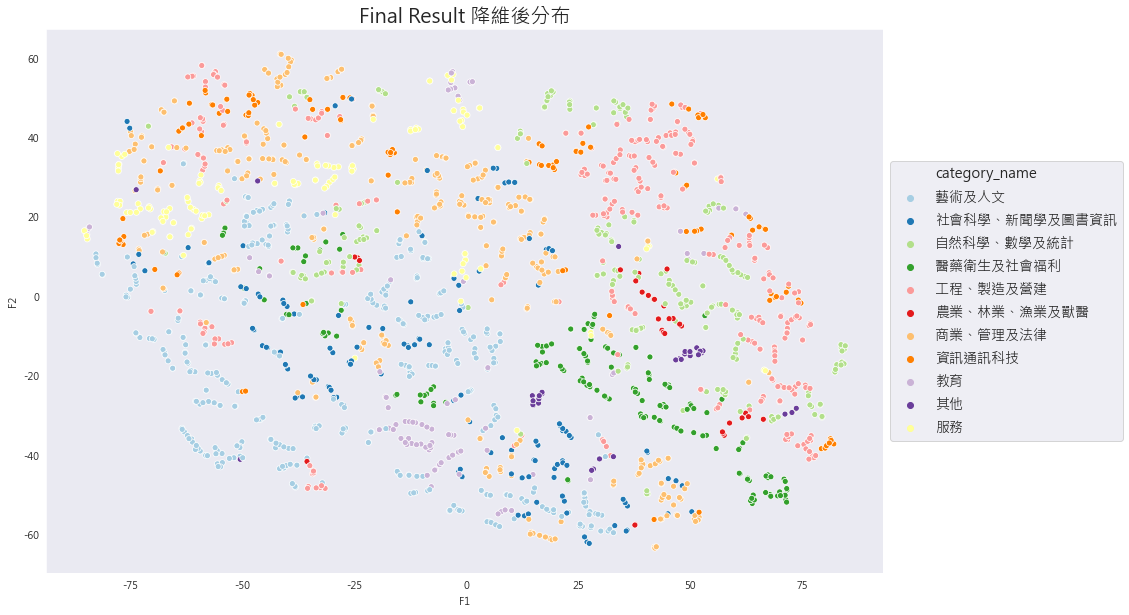

In [ ]:
plot_2D(final_data,"Final Result",(15,10))

Create a larger plot below, labeling each point with the department's abbreviation, and set font sizes to avoid overlap.

In [ ]:
final_data = final_data.drop('category_id', axis=1)

In [ ]:
name_df = uname.loc[:,['department_id','school_name_abbr','department_name_abbr']].set_index('department_id')
name_df['name_abbr'] = name_df['school_name_abbr'] + name_df['department_name_abbr']
name_df = name_df.drop(['school_name_abbr','department_name_abbr'], axis=1)
final_data['name'] = name_df
final_data

,F1,F2,category_name,name
dep_id,,,,
001012,30.038033,-59.062603,藝術及人文,臺大中文
001022,30.269844,-55.071972,藝術及人文,臺大外文
001032,31.678951,-59.043610,藝術及人文,臺大歷史
001042,32.051746,-58.573097,藝術及人文,臺大哲學
001052,32.870159,-59.477665,藝術及人文,臺大人類學系
...,...,...,...,...
150122,39.261131,1.088991,農業、林業、漁業及獸醫,宜蘭園藝
150132,41.651649,33.800468,工程、製造及營建,宜蘭電機
150142,40.795284,34.975101,工程、製造及營建,宜蘭電子工程


In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.1, point['y'], point['val'],fontsize = 12)

In [ ]:
sns.set_style("white",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['figure.figsize'] = (150,150)
fig, ax1 = plt.subplots(1,1)
g = sns.scatterplot(x = 'F1',y='F2', hue='category_name',data = final_data, palette='Paired',ax=ax1, s=300)
lgd = g.legend(loc='upper right', fontsize=40)
txt = plt.title( "Final Result", fontsize=100)
g.set_xlabel('F1')
g.set_ylabel('F2')
label_point(final_data['F1'], final_data['F2'], final_data['name'], g)
plt.savefig( "Final Result.png",bbox_extra_artists=(lgd,txt), bbox_inches='tight')
plt.show()

The plot (please see "output figure_Final Plot.png due to image size) successfully labels each point with the department. When zoomed in, it is confirmed that points grouped together indeed exhibit high correlation. However, to address the issue of overlapping labels, I discovered a package shared online - adjustText, which can help me resolve the problem of label overlap.

In [ ]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7100 sha256=30a8333f05e6ebf306adc88a0238111628c474ee61c7aa54a7790845069a73db
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
from adjustText import adjust_text

In [ ]:
def label_point_adjust( X, Y, txt, ax):
  texts = [plt.text(X[i], Y[i], txt[i], ha='center', va='center') for i in range(len(X))]
  adjust_text(texts=texts, ax = ax, lim=1, precision = 10E8, fontsize=12)

In [ ]:
plt.rcParams['figure.figsize'] = (150,150)
fig, ax1 = plt.subplots(1,1)
g = sns.scatterplot(x = 'F1',y='F2', hue='category_name',data = final_data, palette='Paired',ax=ax1, s=300)
lgd = g.legend(loc='upper left', fontsize=40)
txt = plt.title( "Final Result (Adjust Text)", fontsize=100)
g.set_xlabel('F1')
g.set_ylabel('F2')
label_point_adjust(final_data['F1'], final_data['F2'], final_data['name'], ax=ax1)
plt.savefig( "Final Result (Adjust Text).png",bbox_extra_artists=(lgd,txt), bbox_inches='tight')

This plot (please see "output figure_Final Plot (Adjust Text).png) due to image size) addresses the majority of overlapping issues, and the final clustering results appear good. Although the downloaded image may exhibit slightly unclear fonts when zoomed in, they remain identifiable. Considering the resolution of the overlapping problem, I find the outcome quite effective.